Investigating Fandango Movie Ratings

INTRODUCTION:

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest (Fandango is an online movie ratings aggregator). He published his analysis in this article — a great piece of data journalism that's totally worth reading.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.






In [1]:
from IPython.display import Image
  
Image(url="https://s3.amazonaws.com/dq-content/288/s1gp_fdg_stars.png")

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

1. The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.

2. In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.

3. For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

In [2]:

from IPython.display import Image
  
Image(url="https://s3.amazonaws.com/dq-content/288/s1gp_actual_vs_displayed.png", width=300, height=300)

The two distributions above are displayed using a simple line plot, which is also a valid way to show the shape of a distribution.
The variable being examined is movie rating, and for each unique rating we can see its relative frequency (percentage) on the y-axis of the graph. When an analysis report is intended for large audiences, relative frequencies (especially percentages) are preferred over absolute frequencies.

Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed.

The distribution of displayed ratings is clearly shifted to the right compared to the actual rating distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. 

Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.



GOAL OF THE PROJECT:

In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis

1. Understanding the Data

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis.

We are going to read in the 2 datasets and understand their structure

In [3]:
import pandas as pd
prev_anlys_data = pd.read_csv('fandango_score_comparison.csv')

In [4]:
post_anlys_data = pd.read_csv('movie_ratings_16_17.csv')

In [5]:
prev_anlys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [6]:
post_anlys_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


We will Isolate the columns that offer information about Fandango's ratings in separate variables so we have just the data we're interested in more readily available for later use.

'FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference'

In [7]:
prev_rating =prev_anlys_data[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]

In [8]:
prev_rating.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


For the other data set, select the the following columns: 'movie', 'year', 'fandango'.

In [9]:
post_rating= post_anlys_data[['movie', 'year', 'fandango']]

In [10]:
post_rating.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


Sampling
Now that we've explored the two datasets, it's time to create our samples. Let's recall that our goal is to check if there's been any change in Fandango's rating system since Hickey's article. All movie ratings on Fandango's website will be our population of interest, irrespective of the release year (for now).

We want to sample our populations at two different time periods: movie ratings before and after Hickey's article. We need our samples to be as representative of the population as possible.

Is our Sample Representative?
For the dataset before Hickey's analysis we have a sample of 146 films. The sampling criteria used are:

the film must have had at least 30 fan reviews on the Fandango's website before Aug. 24, 2015, and

the movie must have had tickets on sale in 2015.

Such criteria do not make the sample random. This is because all those movies that do not meet the criteria were not included. Thus, this sampling is not representative of the entire population.

As for the second dataset, we have movie rating data for 214 of the most popular movies. The sampling criteria are:

the movie must have had a significant number of votes and reviews.

the movie must have been released in 2016 and 2017.

the movie must have had reviews on Fandango as of March 22, 2017.

This dataset does not have a random sample either. Any movie that does not meet the criteria will be excluded from the sample. So we can state that these two samples might have been useful for their analysts' research. Yet, we will not consider them helpful for our analysis. It is therefore necessary for us to change the goal of our analysis by placing some limitations to it. In this way, the samples will become more representative.



3 · Changing the Goal of our Analysis


By changing our goal, we now have two populations that we want to describe and compare with each other:

1. All Fandango's ratings for popular movies released in 2015.
2. All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more.

Let's keep in mind that one of the datasets does not contain information about the number of fan ratings. To solve this issue, we will sample 10 movies to check the number of fan ratings ourselves.

In [11]:
post_rating.sample(10, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


Above we used a value of 1 as the random seed. This is good practice because it suggests that we weren't trying out various random seeds just to get a favorable sample.

As of April 2018, these are the fan ratings we found:

Movie	                                  Fan ratings
Mechanic: Resurrection                    2247
Warcraft	                              7271
Max Steel	                              493
Me Before You	                          5263
Fantastic Beasts and Where to Find Them	  13400
Cell	                                  17
Genius	                                  127
Sully	                                  11877
A Hologram for the King	                  500
Captain America: Civil War	              35057

90% of the movies in our sample are popular. This is enough for us to move forward with a bit more confidence.

Let's also double-check the other dataset for popular movies. The documentation states clearly that there are only movies with at least 30 fan ratings, but it should take only a couple of seconds to double-check here.

In [12]:
sum(prev_rating['Fandango_votes'] < 30)

0

Exploring the data sets, we  noticed that some movies were not released in 2015 and 2016. We need to isolate only the sample points that belong to our populations of interest.

In [13]:
prev_rating['Year'] = prev_rating['FILM'].str[-5:-1]

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
prev_rating.head(2)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015


Let's examine the frequency distribution for the Year column and then isolate the movies released in 2015.

In [15]:
prev_rating['Year'].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [20]:
prev_rating2015 = prev_rating[prev_rating['Year'] == '2015'].copy()
prev_rating2015['Year'].value_counts()

2015    129
Name: Year, dtype: int64

In [25]:
post_rating2016 = post_rating[post_rating['year'] == 2016].copy()
post_rating2016['year'].value_counts()

2016    191
Name: year, dtype: int64

5. Comparing Distribution Shapes for 2015 and 2016

We start simple with making a high-level comparison between the shapes of the distributions of movie ratings for both samples

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

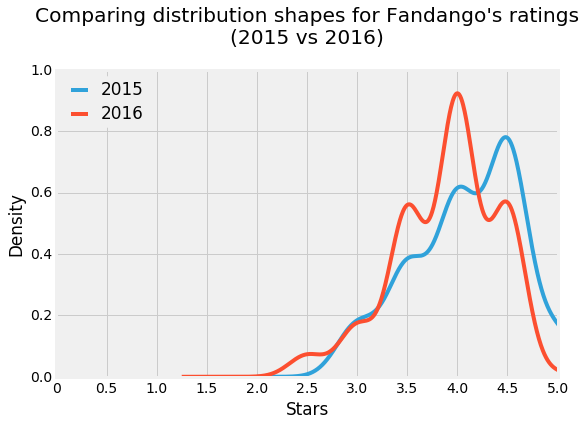

In [30]:
fig, ax = plt.subplots()

prev_rating2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))

# Plot the second kernel density plot
post_rating2016['fandango'].plot.kde(label = '2016', legend = True)

plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward')
plt.style.use('fivethirtyeight')
xticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)

plt.show()

Two aspects are interesting in the figure above:

Both distributions are strongly left-skewed.
The 2016 distribution is slightly shifted to the left relative to the 2015 distribution.

The left skew suggests that movies on Fandango are given mostly high and very high fan ratings. Coupled with the fact that Fandango sells tickets, the high ratings are a bit dubious. It'd be really interesting to investigate this further — ideally in a separate project, since this is irrelevant for the current goal of our analysis.

The slight left shift of the 2016 distribution is very interesting for our analysis. It shows that ratings were slightly lower in 2016 compared to 2015. This suggests that there was a difference indeed between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We can also see the direction of the difference: the ratings in 2016 were slightly lower compared to 2015.

6 · Comparing Relative Frequencies

The kernel density plots from the previous screen showed that there's a clear difference between the two distributions. They also provided us with information about the direction of the difference: movies in 2016 were rated slightly lower than those in 2015.

While comparing the distributions with the help of the kernel density plots was a great start, we now need to analyze more granular information

In [33]:
print('2015' + '\n' + '-' * 16) # To help us distinguish between the two tables immediately and
                                # avoid silly mistakes as we read to and fro
prev_rating2015['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

2015
----------------


3.0     8.527132
3.5    17.829457
4.0    28.682171
4.5    37.984496
5.0     6.976744
Name: Fandango_Stars, dtype: float64

In 2016, very high ratings (4.5 and 5 stars) had significantly lower percentages compared to 2015. In 2016, under 1% of the movies had a perfect rating of 5 stars, compared to 2015 when the percentage was close to 7%. Ratings of 4.5 were also more popular in 2015 — there were approximately 13% more movies rated with a 4.5 in 2015 compared to 2016.

The minimum rating is also lower in 2016 — 2.5 instead of 3 stars, the minimum of 2015. There clearly is a difference between the two frequency distributions.

For some other ratings, the percentage went up in 2016. There was a greater percentage of movies in 2016 that received 3.5 and 4 stars, compared to 2015. 3.5 and 4.0 are high ratings, and this challenges the direction of the change we saw on the kernel density plots.

Determining the Direction of the Change
Let's take a couple of summary metrics for more precise information about the direction of the change. In what follows, we'll compute the mean, the median, and the mode for both distributions, and then we'll use a bar graph to plot the values

In [34]:
mean_2015 = prev_rating2015['Fandango_Stars'].mean()
mean_2016 = post_rating2016['fandango'].mean()

median_2015 = prev_rating2015['Fandango_Stars'].median()
median_2016 = post_rating2016['fandango'].median()

mode_2015 = prev_rating2015['Fandango_Stars'].mode()[0] # the output of Series.mode() is a bit uncommon
mode_2016 = post_rating2016['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


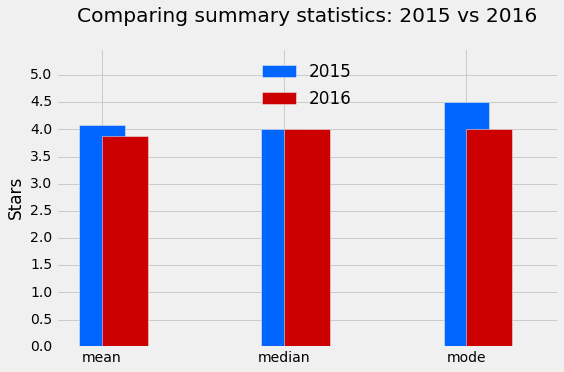

In [35]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

The mean rating was lower in 2016 with approximately 0.2. This means a drop of almost 5% relative to the mean rating in 2015.

In [36]:
(summary.loc['mean'][0] - summary.loc['mean'][1]) / summary.loc['mean'][0]

0.04842683568951993

While the median is the same for both distributions, the mode is lower in 2016 by 0.5. Coupled with what we saw for the mean, the direction of the change we saw on the kernel density plot is confirmed: on average, popular movies released in 2016 were rated slightly lower than popular movies released in 2015.

Conclusion
Our analysis showed that there is indeed a slight difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. We also determined that, on average, popular movies released in 2016 were rated lower on Fandango than popular movies released in 2015.

We cannot be completely sure what caused the change, but the chances are very high that it was caused by Fandango fixing the biased rating system following Hickey's analysis.